In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from astropy import units

import hera_sim
from hera_sim import Simulator
from hera_sim.visibilities import (
    HealVis, VisCPU, ModelData, VisibilitySimulation
)
import pyuvsim
import uvtools

In [2]:
cfg_path = Path("end_to_end")
csv_path = cfg_path / "array_layout.csv"
obsparam_file = cfg_path / "obsparams.yaml"

In [3]:
# # Code for making the array_layout.csv file
# import csv
# fields = ["Name", "Number", "BeamID", "E", "N", "U"]
# antpos = hera_sim.antpos.hex_array(2, split_core=False, outriggers=0)
# ant_to_beam = np.zeros(len(antpos), dtype=int)
# rows = list(
#     [f"ANT{ant}", ant, ant_to_beam[ant], e, n, u]
#     for ant, (e, n, u) in antpos.items()
# )
# with open(csv_path, "w") as f:
#     writer = csv.writer(f, delimiter=' ')
#     writer.writerow(fields)
#     writer.writerow([])
#     writer.writerows(rows)

In [4]:
data_model = ModelData.from_config(str(obsparam_file))

No array_location specified. Defaulting to the HERA site.


In [5]:
# ras = np.array(list(row[1] for row in sky_model_recarray))
# decs = np.array(list(row[2] for row in sky_model_recarray))
# src_pos = np.array([ras, decs]).T * units.deg.to("rad")
# ref_fluxes = np.random.lognormal(mean=1, sigma=5, size=len(ras))
# ref_fluxes[ref_fluxes > 20] = 1 / ref_fluxes[ref_fluxes > 20]
# indices = np.random.uniform(low=-3, high=-1, size=len(ras))

In [6]:
# freqs = np.unique(uvdata.freq_array)
# ref_freq = np.mean(freqs)
# scales = np.exp(np.outer(np.log(freqs / ref_freq), indices))
# fluxes = ref_fluxes.reshape(1,-1) * scales

In [7]:
# data_model = ModelData(
#     uvdata=uvdata,
#     sky_model=sky_model,
#     beam_ids=beam_ids,
#     beams=beam_list,
# )

In [8]:
vis_cpu_sim = VisibilitySimulation(data_model=data_model, simulator=VisCPU())

In [9]:
vis_cpu_sim.simulate();

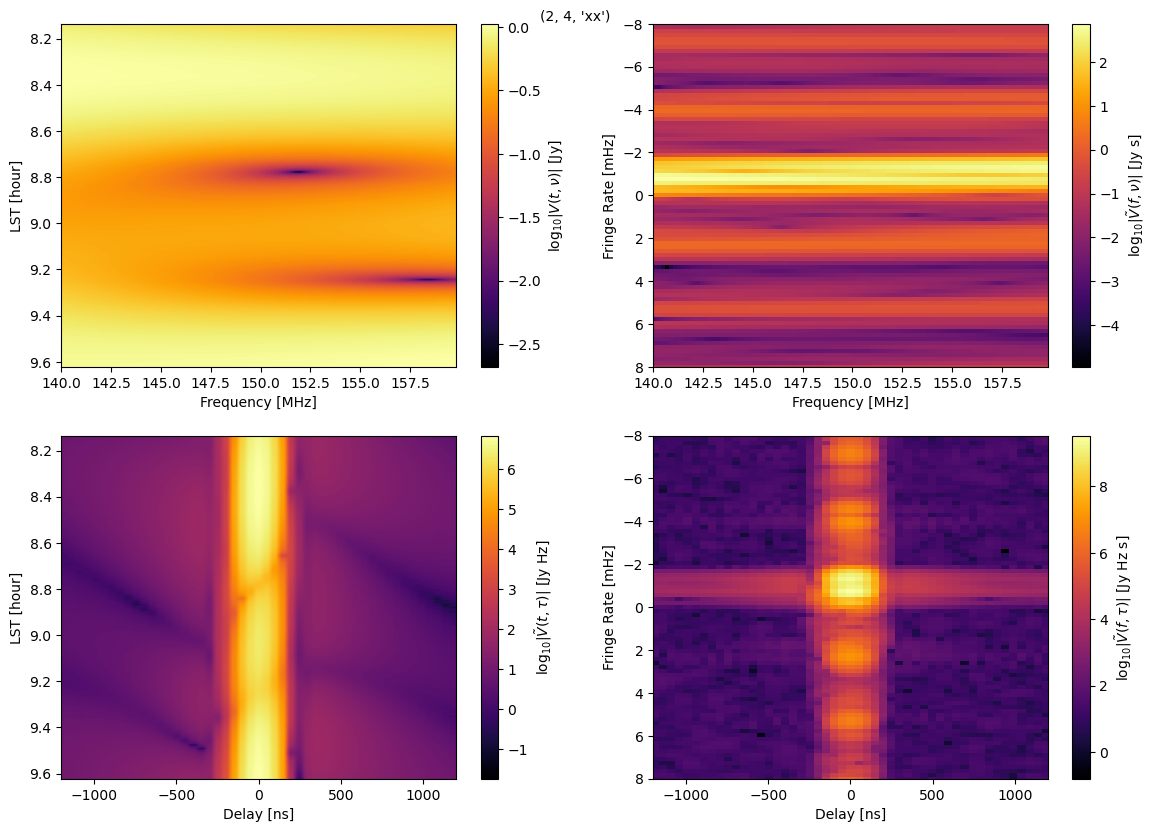

In [10]:
fig = uvtools.plot.fourier_transform_waterfalls(
    vis_cpu_sim.data_model.uvdata,
    antpairpol=(2,4,'xx'),
    plot_limits={"fringe-rate": (8, -8), "delay": (-1200,1200)},
    freq_taper="blackman-harris",
    time_taper="blackman-harris",
)

In [11]:
sim = Simulator(data=vis_cpu_sim.data_model.uvdata.copy())

In [12]:
# # Figure out how to get the beam integral for calculating noise
# beam = beam_list[0]

In [13]:
hera_sim.defaults.set("h1c")

In [14]:
systematics = {
#    "thermal_noise": {"Trx": 100, "omega_p": omega_p, "seed": "initial"},
    "gains": {"seed": "once"},
    "reflections": {"amp": 1e-2, "dly": 250, "amp_jitter": 5e-2, "dly_jitter": 5, "seed": "once"},
    "cross_coupling_spectrum": {
        "dly_range": (800,1000),
        "amp_range": (-2, -4),
        "amp_jitter": 1e-2,
        "dly_jitter": 20,
        "seed": "once",
    },
}

In [15]:
sim.run_sim(**systematics)

You are adding visibilities to a data array *after* multiplicative effects have been introduced.


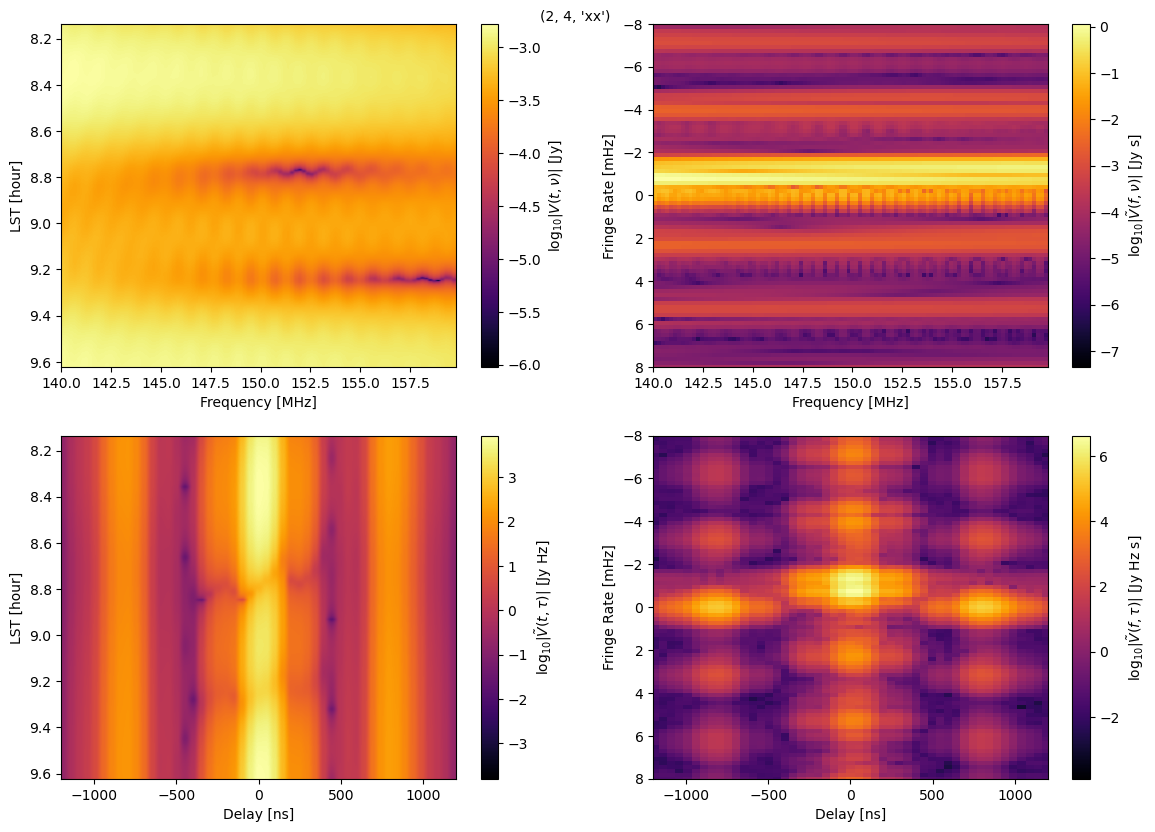

In [16]:
fig = uvtools.plot.fourier_transform_waterfalls(
    sim.data,
    antpairpol=(2,4,'xx'),
    plot_limits={"fringe-rate": (8, -8), "delay": (-1200,1200)},
    freq_taper="blackman-harris",
    time_taper="blackman-harris",
)